# Circular Analysis for four spider species

## Import packages

In [1]:
# Import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import math
from datetime import datetime
from statsmodels.tsa.stattools import acf
import scipy
from scipy import stats
from matplotlib.gridspec import GridSpec
import seaborn as sns

## Circular statistics for four species

These circular statistics are generated from `Circular_Statistics.ipynb` jupyter notebook.

In [3]:
# The following variable names are named in the format: SpeciesName_Period_Stats.
# Latro: L. mactans, Para: P. tepidariorum, Meta: M. wittfeldae, Studio: A. studiosus
# LD: light-dark period, DD: constant darkness period
# r: mean length, angle: mean direction

Latro_LD_r=[0.6399824640390832, 0.5033941421069595, 0.24889371350684786, 0.6632869650275528, 0.7254830760431831, 0.45819193477975856, 0.69802471297825, 0.6555487994465485, 0.6525111361186628, 0.559513266898297, 0.6304318683611363, 0.6398675918404791, 0.6471119370271603, 0.5873353509523842, 0.6911120573530801, 0.598743079582607, 0.5287389221549536, 0.5874341688532081, 0.6713127000504123, 0.3253487649203842, 0.05281964081648024]
Latro_LD_angle=[6.852177195553834, -18.02919277164919, 15.203536683000356, 9.04782553091965, -8.292372107548719, -23.647797958664484, 9.89048406356568, 3.207007028066314, -19.859495568102474, -8.914118209752738, -12.063584395463849, -1.623077477744776, -2.7250407441535565, 3.2046491366336394, 10.537181103359508, 18.164498570400816, -11.537197786203013, -7.96359795498882, 0.3145535563223837, 43.09646776527194, 82.0160595130731]
Latro_DD_r=[0.13232071374573723, 0.26034994981120696, 0.14821885758798886, 0.1360473092453859, 0.1851195111745125, 0.1268328542779552, 0.08426925334058732, 0.14194653711722147, 0.22448258741310864, 0.2582965792953516, 0.18407049433394057, 0.2572323617427865, 0.21075277145525706, 0.1304770658091807, 0.1747354215659963, 0.21334171779804736, 0.27292861274467295, 0.36442477527936806, 0.12267358431379849, 0.27803973795043707, 0.03982271787145056]
Latro_DD_angle=[-68.48883354921114, -53.431033037270446, -107.08890389945195, 51.57212935102942, -54.70715159790676, 9.36955886161055, -1.2776852856432064, 76.73300545646525, 138.61216099486595, 80.58860240900145, 113.56114698331663, 39.55604140817211, 47.49735159971625, -11.470055185735601, 17.874252506962915, 82.89151512255053, -25.76281110163126, 172.27906048197337, -72.4563556941339, 99.26206540470972, -168.31645749754813]

Para_LD_r=[0.6970017582348159, 0.7550343606473188, 0.5843675155015359, 0.8153432263623113, 0.6317360433934154, 0.8274556943894266, 0.7139128129458034, 0.268833903956239, 0.7058649643737356, 0.8637199214089084, 0.8033407487527651, 0.730764579086071, 0.47011220370310747, 0.6745907925095767, 0.282690677752724, 0.4987094746542268, 0.054569864240271736, 0.27773616225158104, 0.5470495587571491, 0.6537321984747814, 0.7904508264000766, 0.4844683776302446, 0.2839221723773498, 0.3563677839800864, 0.7625356195431392, 0.7011345661237132]
Para_LD_angle=[-2.790347289117989, 0.06464286185484994, 11.349970900861951, -22.211836204488314, 11.485014211041031, -10.521874239497883, -10.896601704816735, 1.2553412319581894, -11.802829452921493, -38.78862696961002, -2.412824507280753, 2.159652755620111, 16.092082575024435, 11.041983318586931, 2.345327184930275, 37.60785726978399, 30.105129146784932, -22.008309911067926, 1.474284576800919, 5.215820651944691, -9.417144462382277, 10.996321841510262, 54.67044137765472, 9.530775217184598, 0.713272930147222, -16.211162394275654]
Para_DD_r=[0.3613199683019029, 0.5186962644097305, 0.43646328131310946, 0.4038909564968651, 0.18425341690795372, 0.3339921004815036, 0.527223613604391, 0.31281827764022635, 0.2366349008918937, 0.27399315612462255, 0.39183127275250307, 0.2995875131838092, 0.18129798706513905, 0.37281183660848893, 0.18533393712062837, 0.2986049543617663, 0.3221169139963088, 0.5012796175455814, 0.21038346922331153, 0.44366839608993824, 0.3366497865237997, 0.22223966997422406, 0.32738283996616546, 0.21183117298697562, 0.3956372887543593, 0.28792813203155726]
Para_DD_angle=[-61.17957715968471, -77.20101608417185, -1.7523571341789208, -70.20185528884966, -14.414561209326235, -1.5809700640023496, -59.81271724102092, 11.981041522129745, 1.7863347421046947, -84.33812079470192, -46.06473168436911, -54.832656105387976, 42.069365257532674, -90.9208163169833, -75.58233097666657, -60.55909381301362, -150.07978720570964, -74.83531453799627, 3.455220024462817, -62.15954805476902, -62.02352427345547, -118.73228115476913, -94.74106804938678, -74.0349009949966, -9.825906066053244, -45.02156541101428]

Meta_LD_angle=[-25.46706236017128, -26.193666880420622, -14.157219004148905, 9.598346865576145, -15.133154707607519, -1.2140985001101958, -9.703588184856198, -30.960156114542684, -10.393420251763386, -30.056725675716446, -48.16133064030091, -9.350062269134959, 25.39968227687838, 9.585474660746778, 7.136637721220009, -20.56067039234245, -23.905187236423103, -35.8929710664501, -16.228216957745662, -17.343422759799488, -17.310211676414106, -29.426986054254304, -3.077268032913016, -26.269809895400684, -4.4477010671130675, -16.71293576857783, -23.06790507950421, -41.159325430482596, -13.770104443454569, -20.28724476842675, -17.29723715913521, -7.595419592023317, 5.551962312740965, -44.071224063704385, 1.8849902144916344, 24.253907536386148, 8.771085145806346, -22.950849321494513, -7.335105097414629]
Meta_LD_r=[0.6994002675697643, 0.788888697439223, 0.7221299564226743, 0.6353618984833582, 0.6712908937597819, 0.5342674003926242, 0.6787424432631202, 0.6268977921163938, 0.5839362037414093, 0.7552838623046537, 0.7735593108411377, 0.7483232037286309, 0.7168439683904486, 0.6717263530289243, 0.519125983573467, 0.594397131889472, 0.7458038434613643, 0.8280073762293155, 0.6454735892815034, 0.566582768662485, 0.6528696997252162, 0.7651439735112653, 0.6125095724306826, 0.7080175702024949, 0.6144045269385879, 0.6743339531315637, 0.5979042855279505, 0.7879537273509428, 0.5695522617420767, 0.6577930089700834, 0.6479864932578758, 0.6302114894609208, 0.5729409764197216, 0.5958231476121628, 0.6325069974475365, 0.6695591620750707, 0.6272059549141122, 0.6523937199411379, 0.7114412165489264]
Meta_DD_angle=[-22.13190926171707, -49.93717892715665, -16.15399979665444, -34.20679548132229, -79.08541472107653, -2.6817156859206324, 34.543764191827634, -48.76040260332956, -42.58349960516039, -85.71563686956257, -133.26694378399696, 24.323459264492943, 69.97739231496233, -54.1882678429802, -101.97128110184585, -78.21591106566119, -47.68268153921274, -26.45086711601915, 1.8042008839735701, -2.0889023941181906, -55.99126140713151, -65.67751699459804, -13.33060817648598, -115.88090642909633, 14.842862700339147, -1.6383175017069285, -47.45422565680748, -30.072666309024726, -31.74971522174684, 12.815361967837351, -58.46685916740645, -33.33553912669649, -110.5085796210601, 28.600273884166874, 0.5673960446156234, 26.868688232517705, 56.13739605373184, -45.360526492548736, -21.3629990721326]
Meta_DD_r=[0.46992219723993917, 0.6228896768786564, 0.3657798130051605, 0.5232204418244225, 0.49344816815846115, 0.20365495427516425, 0.4597022106898017, 0.8716999412398604, 0.6686152655791957, 0.8421654209002672, 0.28231006265884007, 0.44451901485762374, 0.6903820007198229, 0.4554894162902244, 0.736921119176871, 0.6518003444225444, 0.7244789159887051, 0.29949564599871364, 0.3061116929070679, 0.3248313792993315, 0.9084083735705623, 0.5477930228218428, 0.694078715659863, 0.3425997766784796, 0.44583470293049554, 0.6313882782671454, 0.4789720542637911, 0.5552438997337861, 0.3070506390328369, 0.40895906585608305, 0.48604712807249895, 0.6075513340722689, 0.17205731544291153, 0.33989244834782006, 0.2695474617135126, 0.5487379222566083, 0.4056675263006857, 0.7497643327920414, 0.7707498061420605]

Studio_LD_r=[0.5983845689019784, 0.5885120258274193, 0.3861354203449669, 0.658538196104124, 0.6289381292972379, 0.36525965935326027, 0.7029117450983644, 0.7366374870793986, 0.48047049123822483, 0.6566123406404599, 0.7327719682470746, 0.735003958963651, 0.5258427428166248, 0.6648825743500288]
Studio_LD_angle=[24.607066055865204, 17.364976100078223, -56.18963514360269, -8.988311055607722, -18.154054417840047, -48.920733635573015, -9.84698239096529, 8.742029282295448, 28.356085432811195, 25.203709303507555, 20.133047713132157, 9.072945787304546, 19.129256192314354, 24.029756667804374]
Studio_DD_r=[0.14352858612807246, 0.21739485439923023, 0.30491018615304094, 0.24743358865042295, 0.16559726195918162, 0.22730793416228084, 0.15993628177964847, 0.5636243214317461, 0.32518433266610075, 0.3221724560238353, 0.8402412469510333, 0.5610960237368441, 0.33491996466553337, 0.3209218271289843]
Studio_DD_angle=[-42.11091308877059, 51.26340360100408, -72.38891924174693, 2.6155990718774467, -14.361990772439025, -157.57099820746987, 22.076802431460177, 56.26513766527518, -93.40981841850264, 13.199573197430048, 37.60799073310433, 50.48875293011008, -84.35542145747682, 18.021290499278912]

In [4]:
# Create a dataframe containing all circular statistics
df=pd.concat([pd.DataFrame({'Latro_LD_angle': Latro_LD_angle, 'Latro_LD_r': Latro_LD_r, 'Latro_DD_angle': Latro_DD_angle, 'Latro_DD_r': Latro_DD_r}), 
                 pd.DataFrame({'Para_LD_angle': Para_LD_angle, 'Para_LD_r': Para_LD_r, 'Para_DD_angle': Para_DD_angle, 'Para_DD_r': Para_DD_r}), 
                 pd.DataFrame({'Meta_LD_angle': Meta_LD_angle, 'Meta_LD_r': Meta_LD_r, 'Meta_DD_angle': Meta_DD_angle, 'Meta_DD_r': Meta_DD_r}), 
                 pd.DataFrame({'Studio_LD_angle': Studio_LD_angle, 'Studio_LD_r': Studio_LD_r, 'Studio_DD_angle': Studio_DD_angle, 'Studio_DD_r': Studio_DD_r})], axis=1)
df.fillna(0)
# Save the data into a .csv file
#df.to_csv('Circular_Summary_4species.csv')
df.head()

,Latro_LD_angle,Latro_LD_r,Latro_DD_angle,Latro_DD_r,Para_LD_angle,Para_LD_r,Para_DD_angle,Para_DD_r,Meta_LD_angle,Meta_LD_r,Meta_DD_angle,Meta_DD_r,Studio_LD_angle,Studio_LD_r,Studio_DD_angle,Studio_DD_r
0,6.852177,0.639982,-68.488834,0.132321,-2.790347,0.697002,-61.179577,0.361320,-25.467062,0.699400,-22.131909,0.469922,24.607066,0.598385,-42.110913,0.143529
1,-18.029193,0.503394,-53.431033,0.260350,0.064643,0.755034,-77.201016,0.518696,-26.193667,0.788889,-49.937179,0.622890,17.364976,0.588512,51.263404,0.217395
2,15.203537,0.248894,-107.088904,0.148219,11.349971,0.584368,-1.752357,0.436463,-14.157219,0.722130,-16.154000,0.365780,-56.189635,0.386135,-72.388919,0.304910
3,9.047826,0.663287,51.572129,0.136047,-22.211836,0.815343,-70.201855,0.403891,9.598347,0.635362,-34.206795,0.523220,-8.988311,0.658538,2.615599,0.247434
4,-8.292372,0.725483,-54.707152,0.185120,11.485014,0.631736,-14.414561,0.184253,-15.133155,0.671291,-79.085415,0.493448,-18.154054,0.628938,-14.361991,0.165597


## Circular Plot for four species

In this graph, each line represents a spider. The direction of the line is the mean direction of the spider's circular stats and the length of the line is the correponding mean length.

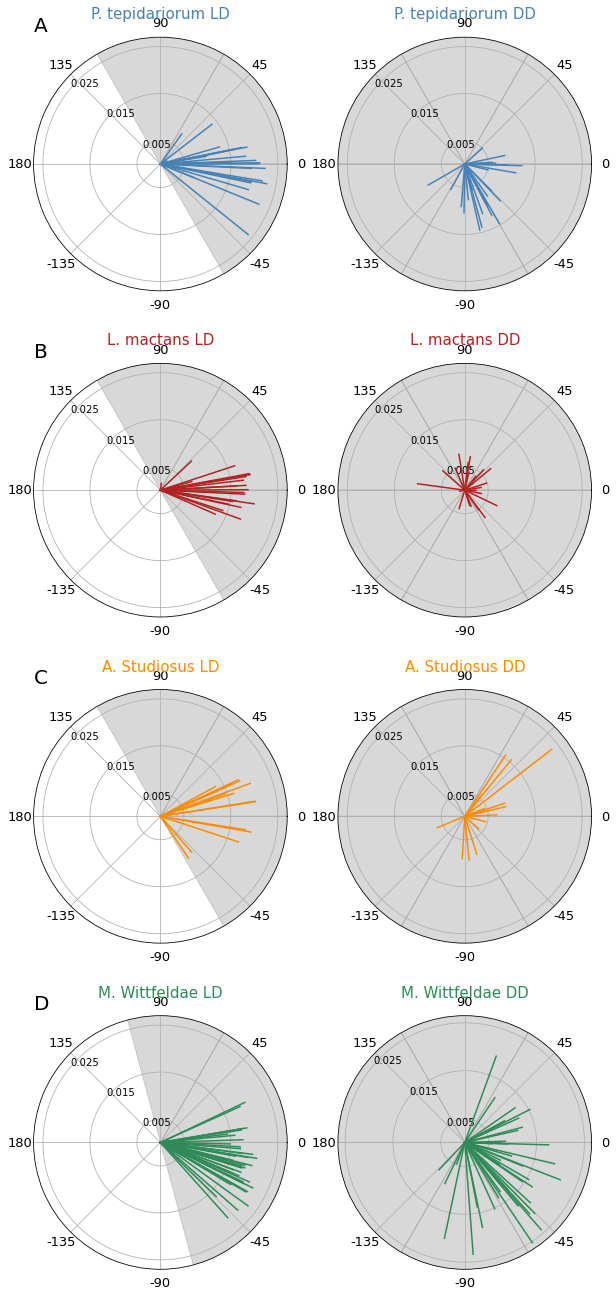

In [5]:
theta_radius_ld_Para=[x*np.pi/180 for x in Para_LD_angle]
theta_radius_dd_Para=[x*np.pi/180 for x in Para_DD_angle]
r_norm_ld_Para=[x/36 for x in Para_LD_r]
r_norm_dd_Para=[x/36 for x in Para_DD_r]
theta_radius_ld_Latro=[x*np.pi/180 for x in Latro_LD_angle]
theta_radius_dd_Latro=[x*np.pi/180 for x in Latro_DD_angle]
r_norm_ld_Latro=[x/36 for x in Latro_LD_r]
r_norm_dd_Latro=[x/36 for x in Latro_DD_r]
theta_radius_ld_Studio=[x*np.pi/180 for x in Studio_LD_angle]
theta_radius_dd_Studio=[x*np.pi/180 for x in Studio_DD_angle]
r_norm_ld_Studio=[x/36 for x in Studio_LD_r]
r_norm_dd_Studio=[x/36 for x in Studio_DD_r]
theta_radius_ld_Meta=[x*np.pi/180 for x in Meta_LD_angle]
theta_radius_dd_Meta=[x*np.pi/180 for x in Meta_DD_angle]
r_norm_ld_Meta=[x/36 for x in Meta_LD_r]
r_norm_dd_Meta=[x/36 for x in Meta_DD_r]

plt.figure(figsize=(10, 23))
#Para_LD
ax1=plt.subplot(421, projection='polar')
ax1.set_xticks([0,np.pi/4, np.pi/2, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4])
ax1.set_xticklabels([0,45,90,135,180,-135,-90,-45], fontsize=13)
plt.title('P. tepidariorum LD', fontsize=15, c='steelblue')
#plt.title('P. tepidariorum '+r"$\bf{" +'LD' + "}$", fontsize=15, c='steelblue')
for i in range(0, len(theta_radius_ld_Para)):
    plt.plot([0, theta_radius_ld_Para[i]], [0, r_norm_ld_Para[i]], 'steelblue')
plt.yticks([0.005, 0.015, 0.025])
plt.title('A', loc='left', fontsize=20)
ax1.axvspan(np.pi/3.00, np.pi*2/3.0,ymax=1.2, alpha=0.3, color='gray')
ax1.axvspan(0, np.pi/3.0,ymax=1.2, alpha=0.3, color='gray')
ax1.axvspan(np.pi*5/3.0, np.pi*2,ymax=1.2, alpha=0.3, color='gray')
ax1.set_rlabel_position(140)
ax1.set_rlim(0,0.027)
#ax.axvspan(-np.pi, np.pi,ymax=1.2, alpha=0.3, color='gray')

#Para_DD
ax2=plt.subplot(422, projection='polar')
ax2.set_xticks([0,np.pi/4, np.pi/2, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4])
ax2.set_xticklabels([0,45,90,135,180,-135,-90,-45], fontsize=13)
plt.title('P. tepidariorum DD', fontsize=15, c='steelblue')
#plt.title('P. tepidariorum '+r"$\bf{" +'DD' + "}$", fontsize=15, c='steelblue')
for i in range(0, len(theta_radius_dd_Para)):
    plt.plot([0, theta_radius_dd_Para[i]], [0, r_norm_dd_Para[i]], 'steelblue')
#plt.yticks([0.003, 0.006, 0.009, 0.0120, 0.015])
plt.yticks([0.005, 0.015, 0.025])
ax2.set_rlabel_position(140)
ax2.set_rlim(0,0.027)
ax2.axvspan(0, np.pi/3.0,ymax=1.2, alpha=0.3, color='gray')
ax2.axvspan(np.pi/3.00, np.pi*2/3.0,ymax=1.2, alpha=0.3, color='gray')
ax2.axvspan(np.pi*2/3.00, np.pi,ymax=1.2, alpha=0.3, color='gray')
ax2.axvspan(np.pi, np.pi*4/3.0,ymax=1.2, alpha=0.3, color='gray')
ax2.axvspan(np.pi*4/3.0, np.pi*5/3.0, ymax=1.2, alpha=0.3, color='gray')
ax2.axvspan(np.pi*5/3.0, np.pi*2,ymax=1.2, alpha=0.3, color='gray')

#Latro_LD
ax3=plt.subplot(423, projection='polar')
ax3.set_xticks([0,np.pi/4, np.pi/2, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4])
ax3.set_xticklabels([0,45,90,135,180,-135,-90,-45], fontsize=13)
plt.title('L. mactans LD', fontsize=15, c='firebrick')
#plt.title('L. mactans '+r"$\bf{" +'LD' + "}$", fontsize=15, c='firebrick')
for i in range(0, len(theta_radius_ld_Latro)):
    plt.plot([0, theta_radius_ld_Latro[i]], [0, r_norm_ld_Latro[i]], 'firebrick')
plt.yticks([0.005, 0.015, 0.025])
plt.title('B', loc='left', fontsize=20)
ax3.axvspan(np.pi/3.00, np.pi*2/3.0,ymax=1.2, alpha=0.3, color='gray')
ax3.axvspan(0, np.pi/3.0,ymax=1.2, alpha=0.3, color='gray')
ax3.axvspan(np.pi*5/3.0, np.pi*2,ymax=1.2, alpha=0.3, color='gray')
ax3.set_rlabel_position(140)
ax3.set_rlim(0,0.027)

#Latro_DD
ax4=plt.subplot(424, projection='polar')
ax4.set_xticks([0,np.pi/4, np.pi/2, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4])
ax4.set_xticklabels([0,45,90,135,180,-135,-90,-45], fontsize=13)
plt.title('L. mactans DD', fontsize=15, c='firebrick')
for i in range(0, len(theta_radius_dd_Latro)):
    plt.plot([0, theta_radius_dd_Latro[i]], [0, r_norm_dd_Latro[i]], 'firebrick')
plt.yticks([0.005, 0.015, 0.025])
ax4.set_rlabel_position(140)
ax4.set_rlim(0,0.027)
ax4.axvspan(0, np.pi/3.0,ymax=1.2, alpha=0.3, color='gray')
ax4.axvspan(np.pi/3.00, np.pi*2/3.0,ymax=1.2, alpha=0.3, color='gray')
ax4.axvspan(np.pi*2/3.00, np.pi,ymax=1.2, alpha=0.3, color='gray')
ax4.axvspan(np.pi, np.pi*4/3.0,ymax=1.2, alpha=0.3, color='gray')
ax4.axvspan(np.pi*4/3.0, np.pi*5/3.0, ymax=1.2, alpha=0.3, color='gray')
ax4.axvspan(np.pi*5/3.0, np.pi*2,ymax=1.2, alpha=0.3, color='gray')

#Studio_LD
ax5=plt.subplot(425, projection='polar')
ax5.set_xticks([0,np.pi/4, np.pi/2, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4])
ax5.set_xticklabels([0,45,90,135,180,-135,-90,-45], fontsize=13)
plt.title('A. Studiosus LD', fontsize=15, c='darkorange')
for i in range(0, len(theta_radius_ld_Studio)):
    plt.plot([0, theta_radius_ld_Studio[i]], [0, r_norm_ld_Studio[i]], 'darkorange')
plt.yticks([0.005, 0.015, 0.025])
plt.title('C', loc='left', fontsize=20)
ax5.axvspan(np.pi/3.00, np.pi*2/3.0,ymax=1.2, alpha=0.3, color='gray')
ax5.axvspan(0, np.pi/3.0,ymax=1.2, alpha=0.3, color='gray')
ax5.axvspan(np.pi*5/3.0, np.pi*2,ymax=1.2, alpha=0.3, color='gray')
ax5.set_rlabel_position(140)
ax5.set_rlim(0,0.027)

#Studio_DD
ax6=plt.subplot(426, projection='polar')
ax6.set_xticks([0,np.pi/4, np.pi/2, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4])
ax6.set_xticklabels([0,45,90,135,180,-135,-90,-45], fontsize=13)
plt.title('A. Studiosus DD', fontsize=15, c='darkorange')
for i in range(0, len(theta_radius_dd_Studio)):
    plt.plot([0, theta_radius_dd_Studio[i]], [0, r_norm_dd_Studio[i]], 'darkorange')
plt.yticks([0.005, 0.015, 0.025])
ax6.set_rlabel_position(140)
ax6.set_rlim(0,0.027)
ax6.axvspan(0, np.pi/3.0,ymax=1.2, alpha=0.3, color='gray')
ax6.axvspan(np.pi/3.00, np.pi*2/3.0,ymax=1.2, alpha=0.3, color='gray')
ax6.axvspan(np.pi*2/3.00, np.pi,ymax=1.2, alpha=0.3, color='gray')
ax6.axvspan(np.pi, np.pi*4/3.0,ymax=1.2, alpha=0.3, color='gray')
ax6.axvspan(np.pi*4/3.0, np.pi*5/3.0, ymax=1.2, alpha=0.3, color='gray')
ax6.axvspan(np.pi*5/3.0, np.pi*2,ymax=1.2, alpha=0.3, color='gray')

#Meta_LD
ax7=plt.subplot(427, projection='polar')
ax7.set_xticks([0,np.pi/4, np.pi/2, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4])
ax7.set_xticklabels([0,45,90,135,180,-135,-90,-45], fontsize=13)
plt.title('M. Wittfeldae LD', fontsize=15, c='seagreen')
for i in range(0, len(theta_radius_ld_Meta)):
    plt.plot([0, theta_radius_ld_Meta[i]], [0, r_norm_ld_Meta[i]], 'seagreen')
plt.yticks([0.005, 0.015, 0.025])
plt.title('D', loc='left', fontsize=20)
ax7.axvspan(np.pi/3.0, np.pi*7/12.0,ymax=1.2, alpha=0.3, color='gray')
ax7.axvspan(0, np.pi/3.0,ymax=1.2, alpha=0.3, color='gray')
ax7.axvspan(np.pi*19/12.0, np.pi*2,ymax=1.7, alpha=0.3, color='gray')
ax7.set_rlabel_position(140)
ax7.set_rlim(0,0.027)

#Meta_DD
ax8=plt.subplot(428, projection='polar')
ax8.set_xticks([0,np.pi/4, np.pi/2, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4])
ax8.set_xticklabels([0,45,90,135,180,-135,-90,-45], fontsize=13)
plt.title('M. Wittfeldae DD', fontsize=15, c='seagreen')
for i in range(0, len(theta_radius_dd_Meta)):
    plt.plot([0, theta_radius_dd_Meta[i]], [0, r_norm_dd_Meta[i]], 'seagreen')
plt.yticks([0.005, 0.015, 0.025])
ax8.set_rlabel_position(140)
ax8.axvspan(0, np.pi/3.0,ymax=1.2, alpha=0.3, color='gray')
ax8.axvspan(np.pi/3.00, np.pi*2/3.0,ymax=1.2, alpha=0.3, color='gray')
ax8.axvspan(np.pi*2/3.00, np.pi,ymax=1.2, alpha=0.3, color='gray')
ax8.axvspan(np.pi, np.pi*4/3.0,ymax=1.2, alpha=0.3, color='gray')
ax8.axvspan(np.pi*4/3.0, np.pi*5/3.0, ymax=1.2, alpha=0.3, color='gray')
ax8.axvspan(np.pi*5/3.0, np.pi*2,ymax=1.2, alpha=0.3, color='gray')

plt.savefig('CircularPlot_4species.png')
plt.show()

## Boxplot for mean length and mean direction

In this graph, we plot the distribution for the mean direction and mean length of each species.

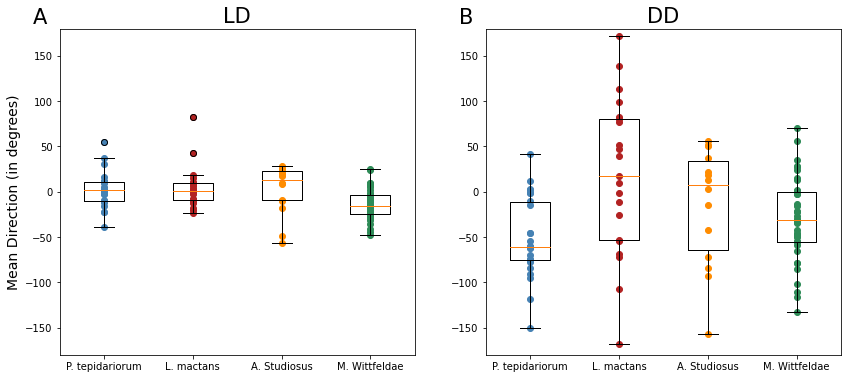

In [6]:
# boxplot for mean direction distribution of four species
x1=np.ones(len(Para_LD_angle))
xx2=np.ones(len(Latro_LD_angle))
xx3=np.ones(len(Studio_LD_angle))
xx4=np.ones(len(Meta_LD_angle))
x2=[x+1 for x in xx2]
x3=[x+2 for x in xx3]
x4=[x+3 for x in xx4]

plt.figure(figsize=(14, 6))
ax=plt.subplot(121)
ax.text(0.2, 186, 'A', fontsize=21)
plt.title('LD', fontsize=21)
ax.boxplot([Para_LD_angle, Latro_LD_angle, Studio_LD_angle, Meta_LD_angle], labels=['P. tepidariorum', 'L. mactans', 'A. Studiosus', 'M. Wittfeldae'])
ax.scatter(x1, Para_LD_angle, c='steelblue')
ax.scatter(x2, Latro_LD_angle, c='firebrick')
ax.scatter(x3, Studio_LD_angle, c='darkorange')
ax.scatter(x4, Meta_LD_angle, c='seagreen')
plt.ylim(-180, 180)
plt.ylabel('Mean Direction (in degrees)', fontsize=14)

plt.subplot(122)
plt.text(0.2, 186, 'B', fontsize=21)
plt.title('DD', fontsize=21)
plt.boxplot([Para_DD_angle, Latro_DD_angle, Studio_DD_angle, Meta_DD_angle], labels=['P. tepidariorum', 'L. mactans', 'A. Studiosus', 'M. Wittfeldae'])
plt.scatter(x1, Para_DD_angle, c='steelblue')
plt.scatter(x2, Latro_DD_angle, c='firebrick')
plt.scatter(x3, Studio_DD_angle, c='darkorange')
plt.scatter(x4, Meta_DD_angle, c='seagreen')
plt.ylim(-180, 180)

plt.savefig('Boxplot_4species_angle.png')
plt.show()

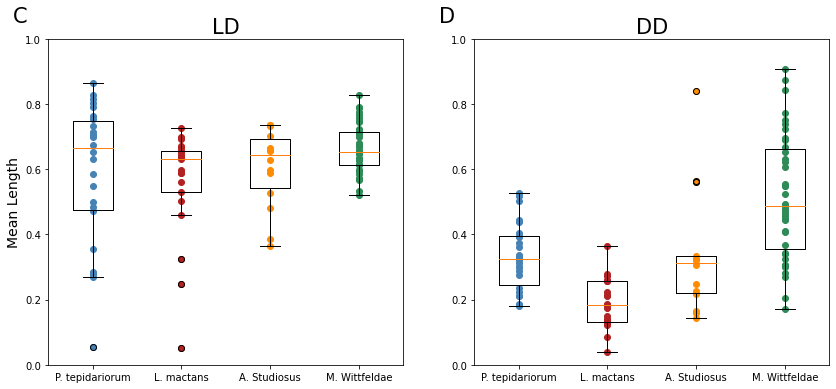

In [7]:
# boxplot for mean length distribution of four species
x1=np.ones(len(Para_LD_angle))
xx2=np.ones(len(Latro_LD_angle))
xx3=np.ones(len(Studio_LD_angle))
xx4=np.ones(len(Meta_LD_angle))
x2=[x+1 for x in xx2]
x3=[x+2 for x in xx3]
x4=[x+3 for x in xx4]

plt.figure(figsize=(14, 6))
ax=plt.subplot(121)
ax.text(0.1, 1.05, 'C', fontsize=21)
plt.title('LD', fontsize=21)
ax.boxplot([Para_LD_r, Latro_LD_r, Studio_LD_r, Meta_LD_r], labels=['P. tepidariorum', 'L. mactans', 'A. Studiosus', 'M. Wittfeldae'])
ax.scatter(x1, Para_LD_r, c='steelblue')
ax.scatter(x2, Latro_LD_r, c='firebrick')
ax.scatter(x3, Studio_LD_r, c='darkorange')
ax.scatter(x4, Meta_LD_r, c='seagreen')
plt.ylim(0, 1)
plt.ylabel('Mean Length', fontsize=14)

plt.subplot(122)
plt.text(0.1, 1.05, 'D', fontsize=21)
plt.title('DD', fontsize=21)
plt.boxplot([Para_DD_r, Latro_DD_r, Studio_DD_r, Meta_DD_r], labels=['P. tepidariorum', 'L. mactans', 'A. Studiosus', 'M. Wittfeldae'])
plt.scatter(x1, Para_DD_r, c='steelblue')
plt.scatter(x2, Latro_DD_r, c='firebrick')
plt.scatter(x3, Studio_DD_r, c='darkorange')
plt.scatter(x4, Meta_DD_r, c='seagreen')
plt.ylim(0, 1)

plt.savefig('Boxplot_4species_length.png')
plt.show()

## ECDF (Empirical Cumulative Distribution Function) for mean direction

This graph shows how many percentage of spiders has a mean direction less than the number on the x axis. Each species is shown by different markers. The shaded area represents the dark period. In DD, a 45 degree dashed line is drawn which indicates a uniform distribution.

<ipython-input-8-4ecb3f39aa16>:34: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(122, sharey=ax, sharex=ax)


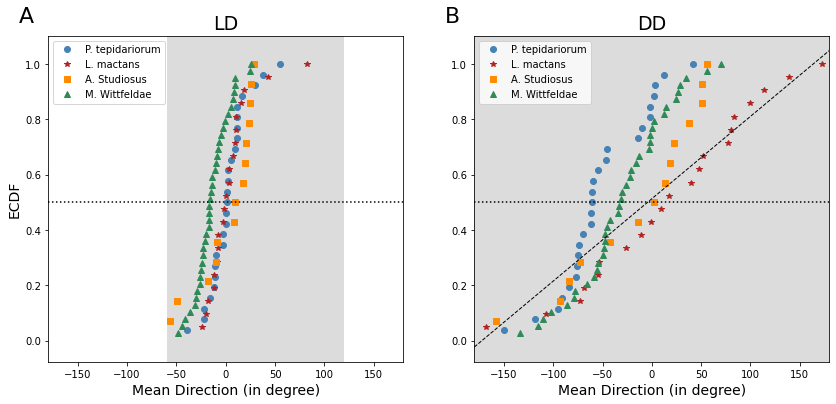

In [8]:
plt.figure(figsize=(14, 6))

x_para_ld = np.sort(Para_LD_angle)
x_para_dd = np.sort(Para_DD_angle)
y_para = np.arange(1, len(x_para_ld)+1) / len(x_para_ld)
x_latro_ld = np.sort(Latro_LD_angle)
x_latro_dd = np.sort(Latro_DD_angle)
y_latro = np.arange(1, len(x_latro_ld)+1) / len(x_latro_ld)
x_studio_ld = np.sort(Studio_LD_angle)
x_studio_dd = np.sort(Studio_DD_angle)
y_studio = np.arange(1, len(x_studio_ld)+1) / len(x_studio_ld)
x_meta_ld = np.sort(Meta_LD_angle)
x_meta_dd = np.sort(Meta_DD_angle)
y_meta = np.arange(1, len(x_meta_ld)+1) / len(x_meta_ld)

ld=[x_para_ld, x_latro_ld, x_studio_ld, x_meta_ld]
dd=[x_para_dd, x_latro_dd, x_studio_dd, x_meta_dd]

ax=plt.subplot(121)
plt.title('LD', fontsize=19)
ax.axvspan(-60, 120, facecolor='gainsboro')
ax.plot(x_para_ld, y_para, marker='o', linestyle='none', c='steelblue')
plt.plot(x_latro_ld, y_latro, marker='*', linestyle='none', c='firebrick')
plt.plot(x_studio_ld, y_studio, marker='s', linestyle='none', c='darkorange')
plt.plot(x_meta_ld, y_meta, marker='^', linestyle='none', c='seagreen')
plt.axhline(y=0.5, ls=":", c="black")
ax.set_xlim(-180, 180)
plt.ylabel('ECDF', fontsize=14)
plt.xlabel('Mean Direction (in degree)', fontsize=14)
plt.legend(['P. tepidariorum','L. mactans', 'A. Studiosus', 'M. Wittfeldae'])
ax.text(-210, 1.15, 'A', fontsize=22)

ax2=plt.subplot(122, sharey=ax, sharex=ax)
plt.subplot(122, sharey=ax, sharex=ax)
plt.title('DD', fontsize=19)
ax2.axvspan(-180, 180, facecolor='gainsboro')
plt.plot(x_para_dd, y_para, marker='o', linestyle='none', c='steelblue')
plt.plot(x_latro_dd, y_latro, marker='*', linestyle='none', c='firebrick')
plt.plot(x_studio_dd, y_studio, marker='s', linestyle='none', c='darkorange')
plt.plot(x_meta_dd, y_meta, marker='^', linestyle='none', c='seagreen')
plt.axhline(y=0.5, ls=":", c="black")
ax2.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c="black", linewidth=1)
plt.xlabel('Mean Direction (in degree)', fontsize=14)
plt.xlim(-180, 180)
plt.legend(['P. tepidariorum','L. mactans', 'A. Studiosus', 'M. Wittfeldae'])
ax2.text(-210, 1.15, 'B', fontsize=22)

plt.savefig('ECDF_4species.png')
plt.show()

## Histogram for mean direction in LD and DD period

This graph shows the distribution of mean direction for each species in LD and DD period by histogram. The y axis shows the percentage of spiders in the corresponding x axis range.

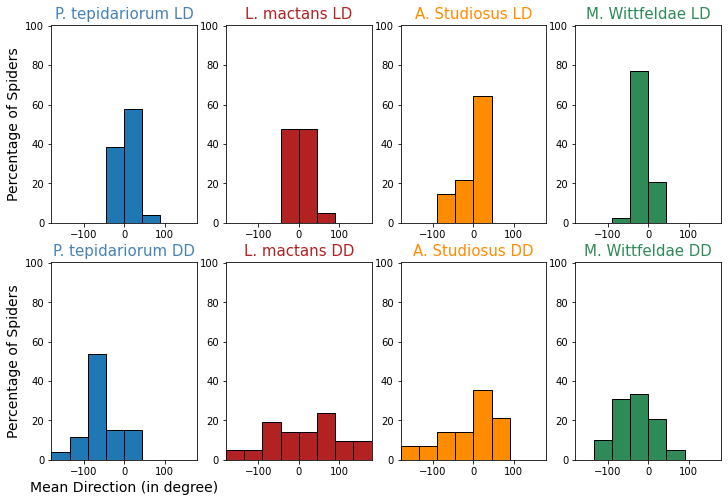

In [9]:
plt.figure(figsize=(12, 8))

distance=45
num=int(360/distance)

ax=plt.subplot(241)
plt.title('P. tepidariorum LD', fontsize=15, c='steelblue')
ax.hist(Para_LD_angle, bins=num, range=(-180, 180), edgecolor='black', density=True)
ax.set_xlim(-180, 180)
ax.set_ylim(0, 1/45+0.0001)
ax.set_yticks(np.arange(0, 1/45+0.0001, step=1/(45*5)))
ax.set_yticklabels(np.arange(0, 101, step=20))
plt.ylabel('Percentage of Spiders', fontsize=14)

plt.subplot(242, sharey=ax, sharex=ax)
plt.title('L. mactans LD', fontsize=15, c='firebrick')
plt.hist(Latro_LD_angle, bins=num, range=(-180, 180), color='firebrick', edgecolor='black', density=True)

plt.subplot(243, sharey=ax, sharex=ax)
plt.title('A. Studiosus LD', fontsize=15, c='darkorange')
plt.hist(Studio_LD_angle, bins=num, range=(-180, 180), color='darkorange', edgecolor='black', density=True)

plt.subplot(244, sharey=ax, sharex=ax)
plt.title('M. Wittfeldae LD', fontsize=15, c='seagreen')
plt.hist(Meta_LD_angle, bins=num, range=(-180, 180), color='seagreen', edgecolor='black', density=True)

plt.subplot(245, sharey=ax, sharex=ax)
plt.title('P. tepidariorum DD', fontsize=15, c='steelblue')
plt.hist(Para_DD_angle, bins=num, range=(-180, 180), edgecolor='black', density=True)
plt.xlim(-180, 180)
plt.xlabel('Mean Direction (in degree)', fontsize=14, ha='center')
plt.ylabel('Percentage of Spiders', fontsize=14)

plt.subplot(246, sharey=ax, sharex=ax)
plt.title('L. mactans DD', fontsize=15, c='firebrick')
plt.hist(Latro_DD_angle, bins=num, range=(-180, 180), color='firebrick', edgecolor='black', density=True)

plt.subplot(247, sharey=ax, sharex=ax)
plt.title('A. Studiosus DD', fontsize=15, c='darkorange')
plt.hist(Studio_DD_angle, bins=num, range=(-180, 180), color='darkorange', edgecolor='black', density=True)

plt.subplot(248, sharey=ax, sharex=ax)
plt.title('M. Wittfeldae DD', fontsize=15, c='seagreen')
plt.hist(Meta_DD_angle, bins=num, range=(-180, 180), color='seagreen', edgecolor='black', density=True)

plt.savefig('Histogram_4species.png')
plt.show()

## T-Test

We perform t-test to test whether the distributions of mean direction of the four species are significantly different.

In [37]:
# put the distributions of the four species together in a list
species = ['P. tepidariorum', 'L. mactans', 'M. Wittfeldae', 'A. Studiosus']
ld_dist = [Para_LD_angle, Latro_LD_angle, Meta_LD_angle, Studio_LD_angle]
dd_dist = [Para_DD_angle, Latro_DD_angle, Meta_DD_angle, Studio_DD_angle]

In [33]:
for i in range(0, 4):
    pvalue = stats.ttest_ind(ld_dist[i], dd_dist[i])[1]
    print(species[i], 'LD vs. DD:', pvalue)

P. tepidariorum LD vs. DD: 7.327190484171197e-07
L. mactans LD vs. DD: 0.49682111447478794
M. Wittfeldae LD vs. DD: 0.03999501765325617
A. Studiosus LD vs. DD: 0.3595911554899657


The distributions of mean direction of P. tepidariorum and M. Wittfeldae in LD and DD period are significantly different (p-value<0.05) while the distributions of that of L.mactans and A. Studiosus are not significantly different (p-value>0.05).

In [36]:
# test the distribution of mean direction of different species in DD period
for i in range(0, 3):
    for j in range(i+1, 4):
        pvalue = stats.ttest_ind(dd_dist[i], dd_dist[j])[1]
        if pvalue<0.05:
            print(species[i], 'DD vs.', species[j], 'DD:', pvalue, '    significantly different')
        else:
            print(species[i], 'DD vs.', species[j], 'DD:', pvalue, '    not significantly different')

P. tepidariorum DD vs. L. mactans DD: 0.000939667094821638     significantly different
P. tepidariorum DD vs. M. Wittfeldae DD: 0.0769534036537322     not significantly different
P. tepidariorum DD vs. A. Studiosus DD: 0.04486005173845025     significantly different
L. mactans DD vs. M. Wittfeldae DD: 0.0068196230032141585     significantly different
L. mactans DD vs. A. Studiosus DD: 0.2362992941679305     not significantly different
M. Wittfeldae DD vs. A. Studiosus DD: 0.3525472171213404     not significantly different


The difference in distributions of mean direction of different species is shown above.

## Bootstrapping for mean direction in LD and DD

### First way: without assumption

We perform the bootstrapping based on the concept of bootstrap and make functions ourselves for the process. This way does not have any assumption about the true distribution of mean direction of each species.

In [38]:
# functions for generating bootstrapping results
def bootstrap_replicate_1d(data, func):
    # Chosse entries out of the data array
    bs_sample = np.random.choice(data, len(data))
    
    # Compute statistics using specify function and return the result
    return func(bs_sample)

# Draw bootstrap replicates
def draw_bs_reps(data, func, size=1):
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
    
    return bs_replicates

In [45]:
for i in range(4):
    bs_replicates=draw_bs_reps(ld_dist[i], np.mean, 10000)
    ci = np.percentile(bs_replicates, [2.5, 97.5])
    print('95 confidence interval for %s in LD: %s' %(species[i], ci))

95 confidence interval for P. tepidariorum in LD: [-4.88647066  9.63288073]
95 confidence interval for L. mactans in LD: [-4.50440018 14.75389306]
95 confidence interval for M. Wittfeldae in LD: [-18.98016987  -8.41052398]
95 confidence interval for A. Studiosus in LD: [-12.03244213  15.30435642]


In [46]:
for i in range(4):
    bs_replicates=draw_bs_reps(dd_dist[i], np.mean, 10000)
    ci = np.percentile(bs_replicates, [2.5, 97.5])
    print('95 confidence interval for %s in DD: %s' %(species[i], ci))

95 confidence interval for P. tepidariorum in DD: [-67.36869726 -34.42080787]
95 confidence interval for L. mactans in DD: [-19.35521797  52.46243755]
95 confidence interval for M. Wittfeldae in DD: [-44.98657385 -16.09187335]
95 confidence interval for A. Studiosus in DD: [-48.8514036   15.31890029]


### Second way: assume the true distribution of mean direction follows the normal distribution

We use the `stats.norm.interval()` function to perform bootstrapping.

In [43]:
for i in range(4):
    mu = np.mean(ld_dist[i])
    std = np.std(ld_dist[i])
    n = len(ld_dist[i])
    ci = stats.norm.interval(alpha=0.95, loc=mu, scale=std/np.sqrt(n))
    print('95 confidence interval for %s in LD: %s' %(species[i], ci))

95 confidence interval for P. tepidariorum in LD: (-4.993426690036955, 9.535454452823885)
95 confidence interval for L. mactans in LD: (-5.617263230616452, 13.891450389844604)
95 confidence interval for M. Wittfeldae in LD: (-19.079637857018618, -8.475141308007062)
95 confidence interval for A. Studiosus in LD: (-11.410616145637267, 16.34478127299788)


In [44]:
for i in range(4):
    mu = np.mean(dd_dist[i])
    std = np.std(dd_dist[i])
    n = len(dd_dist[i])
    ci = stats.norm.interval(alpha=0.95, loc=mu, scale=std/np.sqrt(n))
    print('95 confidence interval for %s in DD: %s' %(species[i], ci))

95 confidence interval for P. tepidariorum in DD: (-67.80504170290779, -34.54901507203665)
95 confidence interval for L. mactans in DD: (-18.409798707045695, 53.34290382436396)
95 confidence interval for M. Wittfeldae in DD: (-44.84095826901346, -15.95239216348456)
95 confidence interval for A. Studiosus in DD: (-48.144333964937566, 17.76440381395677)
